# Exploratory data analysis

Show some basic statistics and get insights about the data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geocoder
from iso3166 import countries
import folium

## Load data

We load the data from GitHub to have the latest version (number of COVID-19 cases)

In [4]:
confirmed = pd.read_csv('data/time_series_covid_19_confirmed.csv')
deaths = pd.read_csv('data/time_series_covid_19_deaths.csv')
recovered = pd.read_csv('data/time_series_covid_19_recovered.csv')
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,47,48,50,50,50,53,59,70,75,82
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,360,420,461,502,511,581,639,639,701,773
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,117,130,138,150,150,160,178,178,200,212
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,83,93,99,117,129,149,149,197,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,NaN,Saint Lucia,13.9094,-60.9789,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
438,NaN,Saint Vincent and the Grenadines,12.9843,-61.2872,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
439,NaN,Suriname,3.9193,-56.0278,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
440,"Virgin Islands, U.S.",US,18.3358,-64.8963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,6,6,6,6,10,10,15,16,19,22
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,31,31,31,31,31,33,34,34,35,35
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,43,46,76,76,76,101,118,118,118,118
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,78,78,78,78,78,78,96,96,97,105
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,22,22,23,24,24,24,26,26,26,35


Since these 3 tables are pretty much identical (they have the same structure only different time series because they don't represent the same thing) we'll only look at one of them in detail (`confirmed`). Because if we want to take a look at another one we can do exactly the same analysis and quickly identify outliers or weird values.

In [7]:
confirmed.isnull().sum()

Province/State    135
Country/Region      0
Lat                 0
Long                0
1/22/20             0
1/23/20             0
1/24/20             0
1/25/20             0
1/26/20             0
1/27/20             0
1/28/20             0
1/29/20             0
1/30/20             0
1/31/20             0
2/1/20              0
2/2/20              0
2/3/20              0
2/4/20              0
2/5/20              0
2/6/20              0
2/7/20              0
2/8/20              0
2/9/20              0
2/10/20             0
2/11/20             0
2/12/20             0
2/13/20             0
2/14/20             0
2/15/20             0
2/16/20             0
2/17/20             0
2/18/20             0
2/19/20             0
2/20/20             0
2/21/20             0
2/22/20             0
2/23/20             0
2/24/20             0
2/25/20             0
2/26/20             0
2/27/20             0
2/28/20             0
2/29/20             0
3/1/20              0
3/2/20              0
3/3/20    

In [8]:
# Check that only 'Province/State' has null values
confirmed.isnull().sum().sum()

135

In [9]:
# Fill these with empty strings
confirmed.fillna("", inplace=True)

Check that types are correct

In [10]:
confirmed.dtypes.values

array([dtype('O'), dtype('O'), dtype('float64'), dtype('float64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dty

Indeed they are: Strings for countries, floats for positions, ints for number of cases

Check that the extreme values present in the dataset are sensible

In [11]:
confirmed.min().values

array(['', 'Afghanistan', -41.4545, -157.8584, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=object)

No negative values

In [12]:
confirmed.max().values

array(['Zhejiang', 'occupied Palestinian territory', 64.9631, 174.886,
       444, 444, 549, 761, 1058, 1423, 3554, 3554, 4903, 5806, 7153,
       11177, 13522, 16678, 19665, 22112, 24953, 27100, 29631, 31728,
       33366, 33366, 48206, 54406, 56249, 58182, 59989, 61682, 62031,
       62442, 62662, 64084, 64084, 64287, 64786, 65187, 65596, 65914,
       66337, 66907, 67103, 67217, 67332, 67466, 67592, 67666, 67707,
       67743, 67760, 67773, 67781, 67786, 67790], dtype=object)

No ridiculous numbers and it's the cumulative number of recovered case, so it the numbers make sense here.

Additionally we can check if for every country the number are in ascending order. They should be because those three sets of values are cumulated throughout the epidemy.

In [31]:
non_asc = []
for i, c in enumerate(confirmed.drop(['Province/State', 
                                      'Country/Region', 
                                      'Lat', 'Long'], axis=1).to_numpy()):
    if not pd.Index(c).is_monotonic_increasing:
        non_asc.append(i)

print('There are {0} countries with unconsistent values, so {1:.2f}% of the countries.'
     .format(len(non_asc), float(len(non_asc))/confirmed.index.size*100))

There are 109 countries with unconsistent values, so 24.66% of the countries.


This can seem a lot but as we can see an example of this below (the first two entries), the majority should be small errors completely unrelevant considering that this data will be use for insights about rate of contamination and visualization.

In [38]:
pd.DataFrame(confirmed.iloc[1, :15]).T

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20
1,,Japan,36,138,2,1,2,2,4,4,7,7,11,15,20


We can verify that by checking if the errors are small, let's say no more than five.

In [124]:
from collections import Counter

significant_errors = pd.DataFrame()

for country_id, c in enumerate(confirmed.drop(['Province/State', 
                                      'Country/Region', 
                                      'Lat', 'Long'], axis=1).to_numpy()):
    country = confirmed['Country/Region'][country_id]
    province = confirmed['Province/State'][country_id]
    if np.diff(c).min() < -5:
        dict_diffs = Counter(np.diff(c))
        for k in dict_diffs.keys():
            if k < -5:
                significant_errors = significant_errors.append([[province, country, k, dict_diffs[k]]])
significant_errors.columns =['Province', 'Country', 'Error', 'Count']
significant_errors = significant_errors.set_index(['Province', 'Country'])
significant_errors

,,Error,Count
Province,Country,,
,Japan,-20,1
From Diamond Princess,Australia,-8,1
,Bahrain,-6,1
Diamond Princess,Cruise Ship,-10,1
"Middlesex County, MA",US,-7,1
"Nassau County, NY",US,-17,1
"Santa Clara County, CA",US,-38,1
"Fort Bend County, TX",US,-6,1
"New York County, NY",US,-19,1


As any real world datasets, there are unconsistent errors. Such gaps are weird and should not be possible. However, the number of errors is quite low and there amplitude is such that it may be not mandatory for us to take care of them. Also, as the dataset is updated often we choose not to take measures for now.

## Checking positions

We can look at where we have data with folium

In [30]:
m = folium.Map()

for index, row in confirmed.iterrows():
    long = row['Long']
    lat = row['Lat']
    
    folium.Marker([lat, long]).add_to(m)

m.save('map_eda_all.html')
m

If the map doesn't show you can see it at [map_eda_all.html](./map_eda_all.html)

As we can see we have data for the entire world pretty much.

Now we can take a look at if there are any misslabeled positions, aka points marked as some country but that are in another one.

In [34]:
map_missclassified = folium.Map()

for index, row in confirmed.iterrows():
    name = row['Country/Region']
    province = row['Province/State']
    long = row['Long']
    lat = row['Lat']
    
    try:
        country_code = geocoder.arcgis([lat, long], method='reverse').country
        country_name = countries.get(country_code).name
        
        # Groenland and other such places are marked as 'Groenland, Denmark'
        # So we check that either the country name or the region corresponds
        assert(name == country_name or province == country_name)
    except:
        folium.Marker([lat, long], popup=f"{name}, {province}\n\n{lat}, {long}", tooltip=name)\
                .add_to(map_missclassified)

map_missclassified.save('map_eda_missclassified.html')
map_missclassified

Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/reverseGeocode: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/reverseGeocode: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


If the map doesn't show you can see it at [map_eda_missclassified.html](./map_eda_missclassified.html)

Now we can check manually these few points and we notice that there are only 2 that are somewhat weird.

1. _Canada, Grand Princess_ in the US, it turns out it's correct it's in fact a canadian [cruise ship](https://www.theguardian.com/world/2020/mar/13/from-paradise-to-coronavirus-the-grand-princess-and-the-cruise-from-hell) named Grand Princess that is stuck there because of the virus.
2. _Canada, Recovered_ at position (0, 0), next to Gabon. This one on the other hand, looks like an outlier. The province is named 'Recovered' and the position is (0, 0), it doesn't make sense. We can take a close look at this row. 

In [36]:
outlier_row = confirmed[confirmed['Province/State'] == "Recovered"]
outlier_row

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
238,Recovered,Canada,0.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see it's indeed a garbage row, it has zeros everywhere, thus we can drop it.

In [39]:
confirmed.drop(outlier_row.index, inplace=True)

## Plot the total cases

With this data, the things that are of interest are the locations and the time series. We've looked at the locations now we can look at the time series. The things we'll want to do are probably, looking at the total time series or looking at the time series of some countries; so this is what we do now.

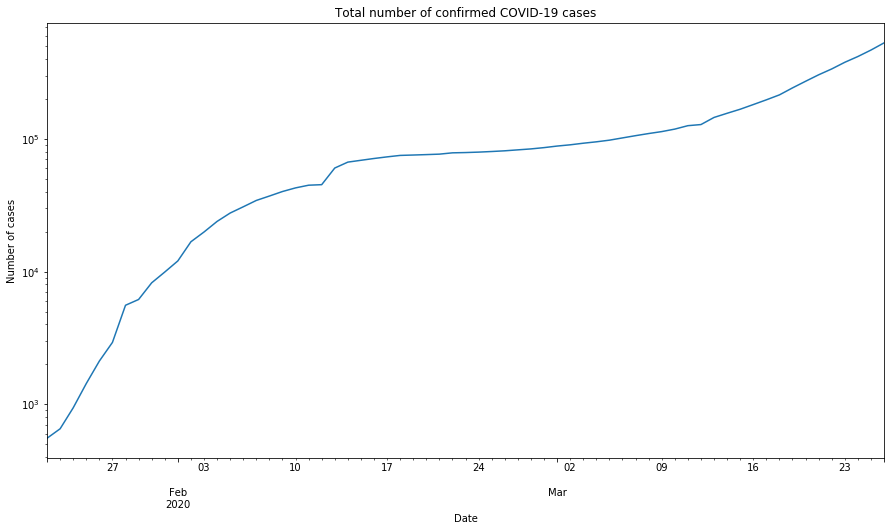

In [54]:
aggregated = confirmed.loc[:, confirmed.columns[4:]].sum()
aggregated.index = pd.to_datetime(aggregated.index)

plt.figure(figsize=(15,8))
aggregated.plot()

plt.title("Total number of confirmed COVID-19 cases")
plt.xlabel("Date")
plt.ylabel("Number of cases")
plt.yscale('log')
plt.show()

## Plotting time series for some countries

In [55]:
country = confirmed.groupby('Country/Region').sum()
country.reset_index(inplace=True)
country = country.loc[:, country.columns != 'Lat']
country = country.loc[:, country.columns != 'Long']
country

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,Albania,0,0,0,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,Algeria,0,0,0,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,Andorra,0,0,0,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela,0,0,0,0,0,0,0,0,0,...,33,36,42,42,70,70,77,84,91,107
171,Vietnam,0,2,2,2,2,2,2,2,2,...,66,75,85,91,94,113,123,134,141,153
172,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,39,41,44,47,48,52,59,59,59,84
173,Zambia,0,0,0,0,0,0,0,0,0,...,0,2,2,2,2,3,3,3,12,16


In [58]:
def plot_country(countries, **args):
    df = country[country['Country/Region'].isin(countries)]
    df = df.T
    df.columns = df.loc['Country/Region'].values
    df = df.loc[df.index != 'Country/Region']
    df.index = pd.to_datetime(df.index)
    
    df.plot(**args)
    plt.yscale('log')
    plt.title("Number of confirmed COVID-19 cases for some countries")
    plt.xlabel("Date")
    plt.ylabel("Number of cases")

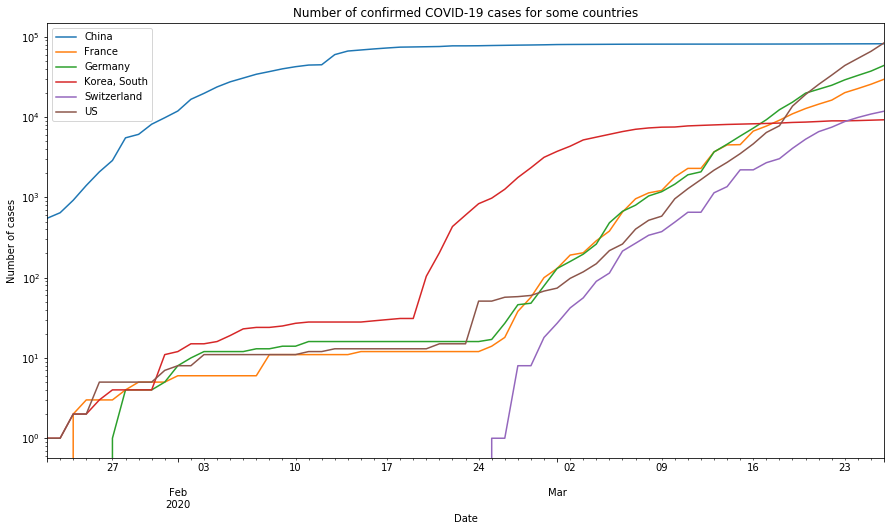

In [60]:
plot_country(['Switzerland', 'France', 'Germany', 'Korea, South', 'US', 'China'], figsize=(15,8))